# Understanding NAICS hierarchy and visualizing the NAICS time series data

## Data Pre-processing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

lmo=pd.read_excel("LMO_Detailed_Industries_by_NAICS.xlsx")
print(lmo.head())
print(lmo.dtypes)

                             LMO_Detailed_Industry      NAICS
0                                            Farms  111 & 112
1                    Fishing, hunting and trapping        114
2                             Forestry and logging        113
3  Support activities for agriculture and forestry        115
4                           Oil and gas extraction        211
LMO_Detailed_Industry    object
NAICS                    object
dtype: object


In [2]:

lmo['NAICS'] = lmo['NAICS'].apply(lambda _: str(_))
print(lmo['NAICS'].dtypes)
lmo.replace(to_replace ="Farms", 
                 value ="Omega Warrior")
lmo.NAICS.replace('(&)',',',regex=True, inplace = True)
print(lmo.head())


object
                             LMO_Detailed_Industry      NAICS
0                                            Farms  111 , 112
1                    Fishing, hunting and trapping        114
2                             Forestry and logging        113
3  Support activities for agriculture and forestry        115
4                           Oil and gas extraction        211


In [3]:
from itertools import chain 
df=lmo.NAICS.str.split(',',expand=True)
l_2d = df.values.tolist()
l_2d=list(chain.from_iterable(l_2d)) 
res = list(filter(None, l_2d)) 
res = list(map(int, res))
print(res)

[111, 112, 114, 113, 115, 211, 213, 212, 22, 23, 311, 312, 321, 322, 331, 332, 333, 3366, 3361, 3362, 3363, 3364, 3365, 3369, 313, 314, 315, 316, 323, 324, 325, 326, 327, 334, 335, 337, 339, 41, 441, 446, 442, 443, 444, 445, 446, 447, 448, 451, 452, 453, 454, 481, 482, 483, 484, 488, 491, 492, 485, 486, 487, 493, 524, 521, 522, 523, 526, 53, 5413, 5415, 5416, 5411, 5412, 5414, 5417, 5418, 5419, 55, 56, 6111, 6112, 6113, 6114, 6115, 6116, 6117, 621, 622, 623, 624, 511, 512, 517, 515, 518, 519, 711, 713, 712, 721, 722, 81, 911, 912, 913, 914, 919]


In [4]:
data1=pd.read_csv('RTRA_Employ_2NAICS_00_05.csv')
df1 = pd.DataFrame(data1.NAICS.str.split('[').tolist(), columns="NAICS CODE".split())
df1['CODE'] = df1['CODE'].replace({']':''}, regex=True)
df1= pd.DataFrame(df1.CODE.str.split('-').tolist(), columns="lower_code upper_code".split())
data1['NAICS']=df1['lower_code']
data1['upper_code']=df1['upper_code']
print(data1.head(2))

   SYEAR  SMTH NAICS  _EMPLOYMENT_ upper_code
0   2000     1    72        148000       None
1   2000     1    56         59250       None


In [5]:

data2=pd.read_csv('RTRA_Employ_2NAICS_06_10.csv')
print(data2.head())
df1 = pd.DataFrame(data2.NAICS.str.split('[').tolist(), columns="NAICS CODE".split())
print(df1.head())
df1['CODE'] = df1['CODE'].replace({']':''}, regex=True)
df1= pd.DataFrame(df1.CODE.str.split('-').tolist(), columns="lower_code upper_code".split())
print(df1.head(2))
data2['NAICS']=df1['lower_code']
data2['upper_code']=df1['upper_code']
print(data2.head(2))

   SYEAR  SMTH                                              NAICS  \
0   2006     1               Accommodation and food services [72]   
1   2006     1  Administrative and support, waste management a...   
2   2006     1    Agriculture, forestry, fishing and hunting [11]   
3   2006     1            Arts, entertainment and recreation [71]   
4   2006     1                                  Construction [23]   

   _EMPLOYMENT_  
0        166750  
1         82750  
2         49000  
3         65000  
4        160750  
                                               NAICS CODE
0                   Accommodation and food services   72]
1  Administrative and support, waste management a...  56]
2        Agriculture, forestry, fishing and hunting   11]
3                Arts, entertainment and recreation   71]
4                                      Construction   23]
  lower_code upper_code
0         72       None
1         56       None
   SYEAR  SMTH NAICS  _EMPLOYMENT_ upper_code
0   2006   

In [6]:
data3=pd.read_csv('RTRA_Employ_2NAICS_11_15.csv')
print(data3.head())
df1 = pd.DataFrame(data3.NAICS.str.split('[').tolist(), columns="NAICS CODE".split())
print(df1.head())
df1['CODE'] = df1['CODE'].replace({']':''}, regex=True)
df1= pd.DataFrame(df1.CODE.str.split('-').tolist(), columns="lower_code upper_code".split())
print(df1.head())
data3['NAICS']=df1['lower_code']
data3['upper_code']=df1['upper_code']
print(data3.head())

   SYEAR  SMTH                                              NAICS  \
0   2011     1               Accommodation and food services [72]   
1   2011     1  Administrative and support, waste management a...   
2   2011     1    Agriculture, forestry, fishing and hunting [11]   
3   2011     1            Arts, entertainment and recreation [71]   
4   2011     1                                  Construction [23]   

   _EMPLOYMENT_  
0        172000  
1         87750  
2         38500  
3         58500  
4        180250  
                                               NAICS CODE
0                   Accommodation and food services   72]
1  Administrative and support, waste management a...  56]
2        Agriculture, forestry, fishing and hunting   11]
3                Arts, entertainment and recreation   71]
4                                      Construction   23]
  lower_code upper_code
0         72       None
1         56       None
2         11       None
3         71       None
4        

In [7]:
data4=pd.read_csv('RTRA_Employ_2NAICS_16_20.csv')
print(data4.head())
df1 = pd.DataFrame(data4.NAICS.str.split('[').tolist(), columns="NAICS CODE".split())
print(df1.head())
df1['CODE'] = df1['CODE'].replace({']':''}, regex=True)
df1= pd.DataFrame(df1.CODE.str.split('-').tolist(), columns="lower_code upper_code".split())
print(df1.head())
data4['NAICS']=df1['lower_code']
data4['upper_code']=df1['upper_code']
print(data4.head())

   SYEAR  SMTH                                              NAICS  \
0   2016     1               Accommodation and food services [72]   
1   2016     1  Administrative and support, waste management a...   
2   2016     1    Agriculture, forestry, fishing and hunting [11]   
3   2016     1            Arts, entertainment and recreation [71]   
4   2016     1                                  Construction [23]   

   _EMPLOYMENT_  
0        157500  
1         92250  
2         36500  
3         59250  
4        197250  
                                               NAICS CODE
0                   Accommodation and food services   72]
1  Administrative and support, waste management a...  56]
2        Agriculture, forestry, fishing and hunting   11]
3                Arts, entertainment and recreation   71]
4                                      Construction   23]
  lower_code upper_code
0         72       None
1         56       None
2         11       None
3         71       None
4        

In [8]:
data5=pd.read_csv('RTRA_Employ_2NAICS_97_99.csv')
print(data5.head())
df1 = pd.DataFrame(data5.NAICS.str.split('[').tolist(), columns="NAICS CODE".split())
print(df1.head())
df1['CODE'] = df1['CODE'].replace({']':''}, regex=True)
df1= pd.DataFrame(df1.CODE.str.split('-').tolist(), columns="lower_code upper_code".split())
print(df1.head())
data5['NAICS']=df1['lower_code']
data5['upper_code']=df1['upper_code']
print(data5.head())

   SYEAR  SMTH                                              NAICS  \
0   1997     1               Accommodation and food services [72]   
1   1997     1  Administrative and support, waste management a...   
2   1997     1    Agriculture, forestry, fishing and hunting [11]   
3   1997     1            Arts, entertainment and recreation [71]   
4   1997     1                                  Construction [23]   

   _EMPLOYMENT_  
0        129250  
1         58500  
2         62250  
3         38750  
4        118000  
                                               NAICS CODE
0                   Accommodation and food services   72]
1  Administrative and support, waste management a...  56]
2        Agriculture, forestry, fishing and hunting   11]
3                Arts, entertainment and recreation   71]
4                                      Construction   23]
  lower_code upper_code
0         72       None
1         56       None
2         11       None
3         71       None
4        

In [9]:
data6=pd.read_csv('RTRA_Employ_3NAICS_00_05.csv')
print(data6.head())
data6['NAICS'],data6['CODE'] = data6.NAICS.str.split('[').str
print(data6.head())
data6['CODE'].replace({']': ''},inplace =True, regex= True)
data6 = data6.dropna(how='any',axis=0) 
print(data6.head())

   SYEAR  SMTH                                     NAICS  _EMPLOYMENT_
0   2000     1     Aboriginal public administration[914]           500
1   2000     1               Accommodation services[721]         33750
2   2000     1  Administrative and support services[561]         55250
3   2000     1                   Air transportation[481]         17500
4   2000     1      Ambulatory health care services[621]         53000
   SYEAR  SMTH                                NAICS  _EMPLOYMENT_  CODE
0   2000     1     Aboriginal public administration           500  914]
1   2000     1               Accommodation services         33750  721]
2   2000     1  Administrative and support services         55250  561]
3   2000     1                   Air transportation         17500  481]
4   2000     1      Ambulatory health care services         53000  621]
   SYEAR  SMTH                                NAICS  _EMPLOYMENT_ CODE
0   2000     1     Aboriginal public administration           500  914


In [10]:
data7=pd.read_csv('RTRA_Employ_3NAICS_06_10.csv')
print(data7.head())
data7['NAICS'],data7['CODE'] = data7.NAICS.str.split('[').str
print(data7.head())
data7['CODE'].replace({']': ''},inplace =True, regex= True)
data7 = data7.dropna(how='any',axis=0) 
print(data7.head())

   SYEAR  SMTH                                     NAICS  _EMPLOYMENT_
0   2006     1     Aboriginal public administration[914]          1000
1   2006     1               Accommodation services[721]         32750
2   2006     1  Administrative and support services[561]         76750
3   2006     1                   Air transportation[481]         15000
4   2006     1      Ambulatory health care services[621]         51500
   SYEAR  SMTH                                NAICS  _EMPLOYMENT_  CODE
0   2006     1     Aboriginal public administration          1000  914]
1   2006     1               Accommodation services         32750  721]
2   2006     1  Administrative and support services         76750  561]
3   2006     1                   Air transportation         15000  481]
4   2006     1      Ambulatory health care services         51500  621]
   SYEAR  SMTH                                NAICS  _EMPLOYMENT_ CODE
0   2006     1     Aboriginal public administration          1000  914


In [11]:
data8=pd.read_csv('RTRA_Employ_3NAICS_11_15.csv')
print(data8.head())
data8['NAICS'],data8['CODE'] = data8.NAICS.str.split('[').str
print(data8.head())
data8['CODE'].replace({']': ''},inplace =True, regex= True)
data8 = data8.dropna(how='any',axis=0) 
print(data8.head())

   SYEAR  SMTH                                     NAICS  _EMPLOYMENT_
0   2011     1     Aboriginal public administration[914]          1750
1   2011     1               Accommodation services[721]         30750
2   2011     1  Administrative and support services[561]         82250
3   2011     1                   Air transportation[481]         14250
4   2011     1      Ambulatory health care services[621]         73000
   SYEAR  SMTH                                NAICS  _EMPLOYMENT_  CODE
0   2011     1     Aboriginal public administration          1750  914]
1   2011     1               Accommodation services         30750  721]
2   2011     1  Administrative and support services         82250  561]
3   2011     1                   Air transportation         14250  481]
4   2011     1      Ambulatory health care services         73000  621]
   SYEAR  SMTH                                NAICS  _EMPLOYMENT_ CODE
0   2011     1     Aboriginal public administration          1750  914


In [12]:
data9=pd.read_csv('RTRA_Employ_3NAICS_16_20.csv')
print(data9.head())
data9['NAICS'],data9['CODE'] = data9.NAICS.str.split('[').str
print(data9.head())
data9['CODE'].replace({']': ''},inplace =True, regex= True)
data9 = data9.dropna(how='any',axis=0) 
print(data9.head())

   SYEAR  SMTH                                     NAICS  _EMPLOYMENT_
0   2016     1     Aboriginal public administration[914]          3500
1   2016     1               Accommodation services[721]         34750
2   2016     1  Administrative and support services[561]         89500
3   2016     1                   Air transportation[481]          9250
4   2016     1      Ambulatory health care services[621]         82250
   SYEAR  SMTH                                NAICS  _EMPLOYMENT_  CODE
0   2016     1     Aboriginal public administration          3500  914]
1   2016     1               Accommodation services         34750  721]
2   2016     1  Administrative and support services         89500  561]
3   2016     1                   Air transportation          9250  481]
4   2016     1      Ambulatory health care services         82250  621]
   SYEAR  SMTH                                NAICS  _EMPLOYMENT_ CODE
0   2016     1     Aboriginal public administration          3500  914


In [13]:
data10=pd.read_csv('RTRA_Employ_3NAICS_97_99.csv')
print(data10.head())
data10['NAICS'],data10['CODE'] = data10.NAICS.str.split('[').str
print(data10.head())
data10['CODE'].replace({']': ''},inplace =True, regex= True)
data10 = data10.dropna(how='any',axis=0) 
print(data10.head())

   SYEAR  SMTH                                     NAICS  _EMPLOYMENT_
0   1997     1     Aboriginal public administration[914]           500
1   1997     1               Accommodation services[721]         24000
2   1997     1  Administrative and support services[561]         56750
3   1997     1                   Air transportation[481]         17000
4   1997     1      Ambulatory health care services[621]         40000
   SYEAR  SMTH                                NAICS  _EMPLOYMENT_  CODE
0   1997     1     Aboriginal public administration           500  914]
1   1997     1               Accommodation services         24000  721]
2   1997     1  Administrative and support services         56750  561]
3   1997     1                   Air transportation         17000  481]
4   1997     1      Ambulatory health care services         40000  621]
   SYEAR  SMTH                                NAICS  _EMPLOYMENT_ CODE
0   1997     1     Aboriginal public administration           500  914


In [14]:

data11=pd.read_csv('RTRA_Employ_4NAICS_00_05.csv')
print(data11.head())
data11 = data11.dropna(how='any',axis=0) 
print(data11.head())


   SYEAR  SMTH  NAICS  _EMPLOYMENT_
0   2000     1   1100           500
1   2000     1   1111             0
2   2000     1   1112          2000
3   2000     1   1113           250
4   2000     1   1114          7750
   SYEAR  SMTH  NAICS  _EMPLOYMENT_
0   2000     1   1100           500
1   2000     1   1111             0
2   2000     1   1112          2000
3   2000     1   1113           250
4   2000     1   1114          7750


In [15]:
data12=pd.read_csv('RTRA_Employ_4NAICS_06_10.csv')
print(data12.head())

data12 = data12.dropna(how='any',axis=0) 
print(data12.head())

   SYEAR  SMTH  NAICS  _EMPLOYMENT_
0   2006     1   1100          1750
1   2006     1   1111             0
2   2006     1   1112           250
3   2006     1   1113          2750
4   2006     1   1114         12250
   SYEAR  SMTH  NAICS  _EMPLOYMENT_
0   2006     1   1100          1750
1   2006     1   1111             0
2   2006     1   1112           250
3   2006     1   1113          2750
4   2006     1   1114         12250


In [16]:
data13=pd.read_csv('RTRA_Employ_4NAICS_11_15.csv')
print(data13.head())

data13 = data13.dropna(how='any',axis=0) 
print(data13.head())

   SYEAR  SMTH  NAICS  _EMPLOYMENT_
0   2011     1   1100           750
1   2011     1   1111             0
2   2011     1   1112           750
3   2011     1   1113          1500
4   2011     1   1114          5500
   SYEAR  SMTH  NAICS  _EMPLOYMENT_
0   2011     1   1100           750
1   2011     1   1111             0
2   2011     1   1112           750
3   2011     1   1113          1500
4   2011     1   1114          5500


In [17]:
data14=pd.read_csv('RTRA_Employ_4NAICS_16_20.csv')
print(data14.head())
data14 = data14.dropna(how='any',axis=0) 
print(data14.head())

   SYEAR  SMTH  NAICS  _EMPLOYMENT_
0   2016     1   1100           500
1   2016     1   1111           750
2   2016     1   1112          2000
3   2016     1   1113          2500
4   2016     1   1114          3750
   SYEAR  SMTH  NAICS  _EMPLOYMENT_
0   2016     1   1100           500
1   2016     1   1111           750
2   2016     1   1112          2000
3   2016     1   1113          2500
4   2016     1   1114          3750


In [18]:

data15=pd.read_csv('RTRA_Employ_4NAICS_97_99.csv')
print(data15.head())
data15 = data15.dropna(how='any',axis=0) 
print(data15.head())

   SYEAR  SMTH  NAICS  _EMPLOYMENT_
0   1997     1   1100          3500
1   1997     1   1111           250
2   1997     1   1112           500
3   1997     1   1113          2250
4   1997     1   1114          5250
   SYEAR  SMTH  NAICS  _EMPLOYMENT_
0   1997     1   1100          3500
1   1997     1   1111           250
2   1997     1   1112           500
3   1997     1   1113          2250
4   1997     1   1114          5250


In [19]:
frames=[data2,data3,data4,data5]
df_2N= data1.append(frames, ignore_index=True)

In [20]:
print(df_2N.head())

   SYEAR  SMTH NAICS  _EMPLOYMENT_ upper_code
0   2000     1    72        148000       None
1   2000     1    56         59250       None
2   2000     1    11         61750       None
3   2000     1    71         39500       None
4   2000     1    23        106250       None


In [21]:
frames=[data7,data8,data9,data10]
df_3N= data6.append(frames, ignore_index=True)
df_3N['NAICS']=df_3N['CODE']
df_3N['CODE']=None
df_3N.columns=['SYEAR','SMTH','NAICS','_EMPLOYMENT_','upper_code']
print(df_3N.head())

   SYEAR  SMTH NAICS  _EMPLOYMENT_ upper_code
0   2000     1   914           500       None
1   2000     1   721         33750       None
2   2000     1   561         55250       None
3   2000     1   481         17500       None
4   2000     1   621         53000       None


In [22]:
frames=[data12,data13,data14,data15]
df_4N= data11.append(frames, ignore_index=True)
df_4N['upper_code']=None
print(df_4N.head())

   SYEAR  SMTH  NAICS  _EMPLOYMENT_ upper_code
0   2000     1   1100           500       None
1   2000     1   1111             0       None
2   2000     1   1112          2000       None
3   2000     1   1113           250       None
4   2000     1   1114          7750       None


In [23]:
frames=[df_3N,df_4N]
df_combined=df_2N.append(frames, ignore_index=True).sort_values(['SYEAR', 'SMTH','NAICS'])
print(df_combined.head())

        SYEAR  SMTH NAICS  _EMPLOYMENT_ upper_code
107508   1997     1  1100          3500       None
107509   1997     1  1111           250       None
107510   1997     1  1112           500       None
107511   1997     1  1113          2250       None
107512   1997     1  1114          5250       None


In [24]:
print(df_combined.dtypes)
df_combined['NAICS'] = df_combined.NAICS.astype('int64')
df_combined['CODE_2']=df_combined['NAICS'].astype(str).str[0:2].astype('int64')
df_combined['CODE_3']=df_combined['NAICS'].astype(str).str[0:3].astype('int64')

df_combined['CODE_4']=df_combined['NAICS'].astype(str).str[0:4].astype('int64')

df_combined['upper_code'].replace([None], 0, inplace=True)

print(df_combined.dtypes)
print(df_combined.sort_values(['SYEAR', 'SMTH','NAICS']).head())

SYEAR            int64
SMTH             int64
NAICS           object
_EMPLOYMENT_     int64
upper_code      object
dtype: object
SYEAR            int64
SMTH             int64
NAICS            int64
_EMPLOYMENT_     int64
upper_code      object
CODE_2           int64
CODE_3           int64
CODE_4           int64
dtype: object
      SYEAR  SMTH  NAICS  _EMPLOYMENT_ upper_code  CODE_2  CODE_3  CODE_4
4754   1997     1     11         62250          0      11      11      11
4763   1997     1     21         16750          0      21      21      21
4770   1997     1     22          9750          0      22      22      22
4756   1997     1     23        118000          0      23      23      23
4762   1997     1     31        190250         33      31      31      31


In [25]:
print (res)


[111, 112, 114, 113, 115, 211, 213, 212, 22, 23, 311, 312, 321, 322, 331, 332, 333, 3366, 3361, 3362, 3363, 3364, 3365, 3369, 313, 314, 315, 316, 323, 324, 325, 326, 327, 334, 335, 337, 339, 41, 441, 446, 442, 443, 444, 445, 446, 447, 448, 451, 452, 453, 454, 481, 482, 483, 484, 488, 491, 492, 485, 486, 487, 493, 524, 521, 522, 523, 526, 53, 5413, 5415, 5416, 5411, 5412, 5414, 5417, 5418, 5419, 55, 56, 6111, 6112, 6113, 6114, 6115, 6116, 6117, 621, 622, 623, 624, 511, 512, 517, 515, 518, 519, 711, 713, 712, 721, 722, 81, 911, 912, 913, 914, 919]


In [26]:
list_2N=[x for x in res if x<100]
list_3N=[x for x in res if x>99 and x<1000]
list_4N=[x for x in res if  x>999]
print(list_2N)
print(list_3N)
print(list_4N)

[22, 23, 41, 53, 55, 56, 81]
[111, 112, 114, 113, 115, 211, 213, 212, 311, 312, 321, 322, 331, 332, 333, 313, 314, 315, 316, 323, 324, 325, 326, 327, 334, 335, 337, 339, 441, 446, 442, 443, 444, 445, 446, 447, 448, 451, 452, 453, 454, 481, 482, 483, 484, 488, 491, 492, 485, 486, 487, 493, 524, 521, 522, 523, 526, 621, 622, 623, 624, 511, 512, 517, 515, 518, 519, 711, 713, 712, 721, 722, 911, 912, 913, 914, 919]
[3366, 3361, 3362, 3363, 3364, 3365, 3369, 5413, 5415, 5416, 5411, 5412, 5414, 5417, 5418, 5419, 6111, 6112, 6113, 6114, 6115, 6116, 6117]


In [27]:
df_combined_2N=df_combined.loc[df_combined['NAICS'].isin(list_2N)]
print(df_combined_2N.head())

      SYEAR  SMTH  NAICS  _EMPLOYMENT_ upper_code  CODE_2  CODE_3  CODE_4
4770   1997     1     22          9750          0      22      22      22
4756   1997     1     23        118000          0      23      23      23
4771   1997     1     41         72000          0      41      41      41
4767   1997     1     53         50750          0      53      53      53
4761   1997     1     55          1750          0      55      55      55


In [28]:
df_combined_3N=df_combined.loc[df_combined['CODE_3'].isin(list_3N)]
print(df_combined_3N.head())


        SYEAR  SMTH  NAICS  _EMPLOYMENT_ upper_code  CODE_2  CODE_3  CODE_4
107509   1997     1   1111           250          0      11     111    1111
107510   1997     1   1112           500          0      11     111    1112
107511   1997     1   1113          2250          0      11     111    1113
107512   1997     1   1114          5250          0      11     111    1114
107513   1997     1   1119           250          0      11     111    1119


In [29]:
df_combined_4N=df_combined.loc[df_combined['CODE_4'].isin(list_4N)]
print(df_combined_4N.head())

        SYEAR  SMTH  NAICS  _EMPLOYMENT_ upper_code  CODE_2  CODE_3  CODE_4
107620   1997     1   3361          2000          0      33     336    3361
107621   1997     1   3362          1250          0      33     336    3362
107622   1997     1   3363          2500          0      33     336    3363
107623   1997     1   3364          2250          0      33     336    3364
107624   1997     1   3365             0          0      33     336    3365


In [30]:

frames=[df_combined_4N,df_combined_3N]
df_final_combined= df_combined_2N.append(frames, ignore_index=True)
#print(df_final_combined.head())
print(df_final_combined.groupby(['NAICS'])["_EMPLOYMENT_"].sum())

NAICS
22       3130750
23      47616500
41      21352250
53      12959250
55         78500
56      23986000
81      27103250
111      4068000
112      3090250
113      3865250
114       753000
115      2585250
211       859000
212      2682250
213      1803500
311      6442750
312      1367250
313        73000
314       422750
315      1309750
316       113750
321     10647500
322      3657250
323      2042750
324       256250
325      1762000
326      1597750
327      1699500
331      1725000
332      3618500
          ...   
6215      901750
6216     1491750
6219      913000
6220    23479000
6230    10445250
6241     8372750
6242      377250
6243      686500
6244     5406000
7111     1044500
7112      541000
7113      334000
7114      149750
7115     3071250
7121      856000
7131      165750
7132     1949000
7139     7008750
7211     9211000
7212      710750
7213       60750
7223     1707000
7224     1894750
7225    32827500
9110     8885250
9111      841000
9120     7892500
9130    

In [31]:
df_final=df_combined.loc[df_combined['NAICS'].isin(res)]
print(df_final.head())

        SYEAR  SMTH  NAICS  _EMPLOYMENT_ upper_code  CODE_2  CODE_3  CODE_4
107620   1997     1   3361          2000          0      33     336    3361
107621   1997     1   3362          1250          0      33     336    3362
107622   1997     1   3363          2500          0      33     336    3363
107623   1997     1   3364          2250          0      33     336    3364
107624   1997     1   3365             0          0      33     336    3365


In [32]:
df_upper=df_combined.loc[df_combined['upper_code'].isin(res)]
print(df_upper.head())
df_final = df_final.append(df_upper, ignore_index=True)
print(df_final.head())

Empty DataFrame
Columns: [SYEAR, SMTH, NAICS, _EMPLOYMENT_, upper_code, CODE_2, CODE_3, CODE_4]
Index: []
   SYEAR  SMTH  NAICS  _EMPLOYMENT_ upper_code  CODE_2  CODE_3  CODE_4
0   1997     1   3361          2000          0      33     336    3361
1   1997     1   3362          1250          0      33     336    3362
2   1997     1   3363          2500          0      33     336    3363
3   1997     1   3364          2250          0      33     336    3364
4   1997     1   3365             0          0      33     336    3365


In [33]:
print(df_2N.sort_values(['SYEAR', 'SMTH','NAICS']).head())

      SYEAR  SMTH NAICS  _EMPLOYMENT_ upper_code
4754   1997     1    11         62250       None
4763   1997     1    21         16750       None
4770   1997     1    22          9750       None
4756   1997     1    23        118000       None
4762   1997     1    31        190250         33


In [34]:
df_2N['NAICS']=df_2N['NAICS'].astype('category')
print(df_2N.dtypes)
gkk = df_2N.groupby('NAICS')['NAICS','_EMPLOYMENT_']
print(gkk.head())

SYEAR              int64
SMTH               int64
NAICS           category
_EMPLOYMENT_       int64
upper_code        object
dtype: object
   NAICS  _EMPLOYMENT_
0     72        148000
1     56         59250
2     11         61750
3     71         39500
4     23        106250
5     61        143500
6     52         78500
7     62        200000
8     51         47000
9     55          1000
10    31        197750
11    21         14750
12    81        100250
13    54        135250
14    91         93750
15    53         37500
16    44        220750
17    48        115000
18    22         10750
19    41         69500
20    72        152500
21    56         64000
22    11         65250
23    71         41250
24    23        115000
25    61        142500
26    52         76750
27    62        201500
28    51         51750
29    55          1500
..   ...           ...
70    31        197250
71    21         14000
72    81         96500
73    54        135750
74    91         88750
75    53  

## Exploratory Data Analysis of NAICS time series data

NAICS
44    71565000
62    66872000
31    49336250
23    47616500
72    46411000
54    44404500
61    40707000
48    33329000
81    27103250
91    26794500
56    23986000
52    23539750
41    21352250
71    15120250
51    14905500
11    14753250
53    12959250
21     5678750
22     3130750
55       78500
Name: _EMPLOYMENT_, dtype: int64
<class 'pandas.core.series.Series'>


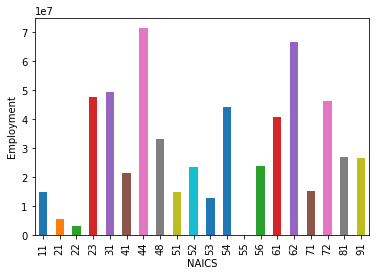

In [35]:
import matplotlib.pyplot as plt
df_2N_sum=df_2N.groupby(['NAICS'])["_EMPLOYMENT_"].sum()
print(df_2N_sum.sort_values(ascending = False) )
print(type(df_2N_sum))
plt.ylabel("Employment")

df_2N_sum.plot(kind='bar')

SYEAR
2017    3484750
2010    3449750
2018    3434750
2016    3362250
2013    3342000
2014    3330250
2011    3317750
2007    3288000
2009    3282000
2015    3216000
2008    3200750
2012    3185000
2006    3155250
2005    3015000
2003    2991750
2004    2970250
2002    2956250
2000    2836500
2001    2832500
1998    2766750
1997    2742250
1999    2719500
2019    2685750
Name: _EMPLOYMENT_, dtype: int64


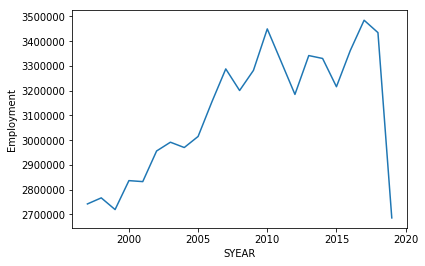

In [36]:


df_2N['Date'] =pd.to_datetime([f'{y}-{m}' for y, m in zip(df_2N.SYEAR,df_2N.SMTH)])
df_2N.index = df_2N['Date']
del df_2N['Date']
rslt_df = df_2N.loc[df_2N['NAICS'] == '44'] 
df_2N_ysum=rslt_df.groupby(['SYEAR'])["_EMPLOYMENT_"].sum()
print(df_2N_ysum.sort_values(ascending = False) )
plt.ylabel("Employment")
plt.xlabel("Year")
df_2N_ysum.plot()
df=rslt_df.groupby('SYEAR')['_EMPLOYMENT_']


CODE_3
445    18740000
441     7714000
448     6928250
446     5664500
444     4607000
443     3304250
442     2624250
447     2535000
Name: _EMPLOYMENT_, dtype: int64


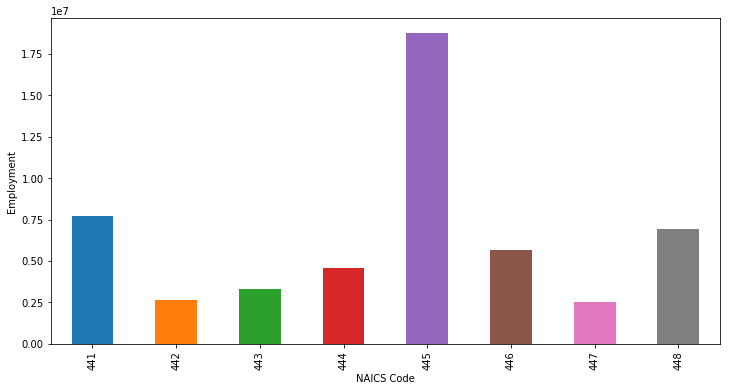

In [56]:
df1_2N=df_final[df_final['CODE_2']==44]
df_2N_sum=df1_2N.groupby(['CODE_3'])["_EMPLOYMENT_"].sum()
print(df_2N_sum.sort_values(ascending = False) )
df_2N_sum.plot(kind="bar", figsize=(12,6))
plt.ylabel("Employment")
plt.xlabel("NAICS Code")
plt.show()

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


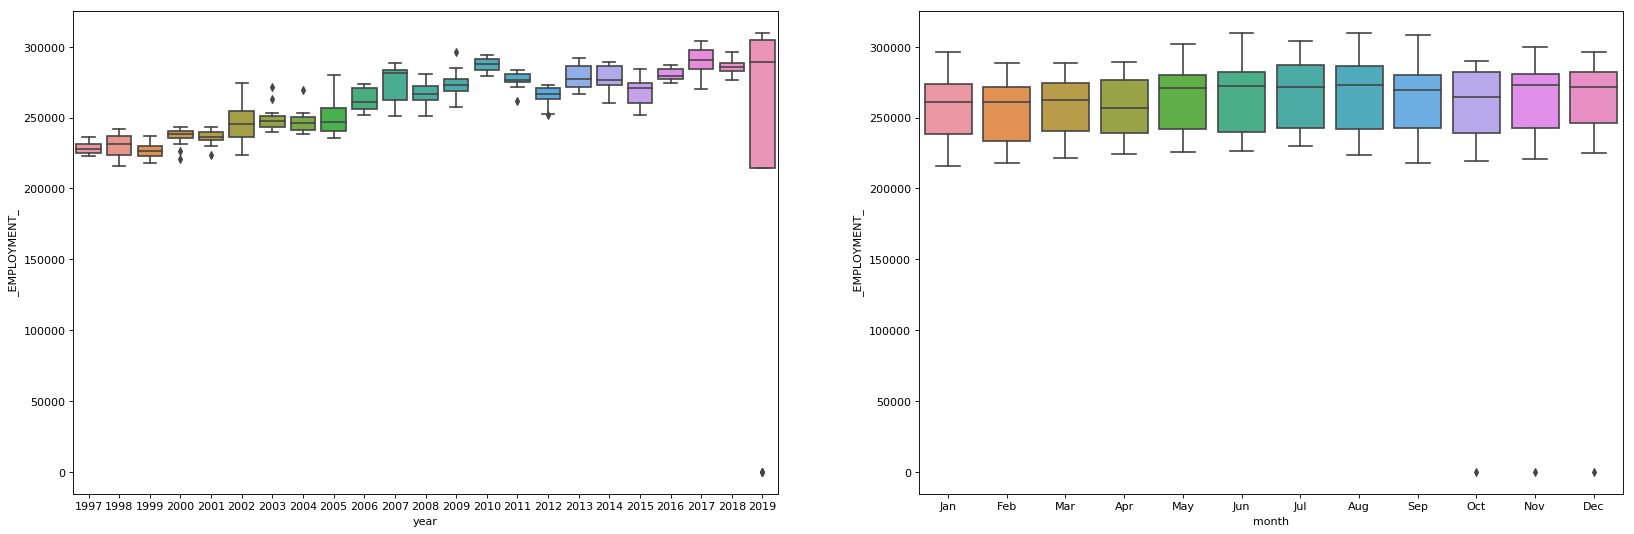

In [38]:
rslt_df = df_2N.loc[df_2N['NAICS'] == '44'] 
#print(rslt_df.index)
#df['year'] = [d.year for d in df.date]
rslt_df['year'] = [d.year for d in rslt_df.index]
rslt_df['month'] = [d.strftime('%b') for d in rslt_df.index]
years = rslt_df['year'].unique()
fig, axes = plt.subplots(1, 2, figsize=(25,8), dpi= 80,)
sns.boxplot(x='year',y='_EMPLOYMENT_',data=rslt_df, ax=axes[0])
sns.boxplot(x='month',y='_EMPLOYMENT_',data=rslt_df, ax=axes[1])
plt.show()

SYEAR
2018    3878750
2017    3642000
2016    3499000
2015    3448500
2012    3302000
2014    3237250
2013    3206500
2010    3165750
2011    3150000
2009    3084000
2008    2893750
2019    2820500
2007    2780750
2006    2732250
2004    2600750
2003    2572000
2005    2553250
2002    2533750
2000    2409500
2001    2366750
1998    2362000
1999    2331500
1997    2301500
Name: _EMPLOYMENT_, dtype: int64


Text(0.5,0,'Year')

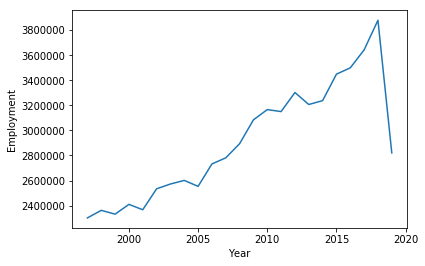

In [39]:

rslt_df = df_2N.loc[df_2N['NAICS'] == '62'] 
df_2N_ysum=rslt_df.groupby(['SYEAR'])["_EMPLOYMENT_"].sum()
print(df_2N_ysum.sort_values(ascending = False) )
df_2N_ysum.plot()
plt.ylabel("Employment")
plt.xlabel("Year")

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


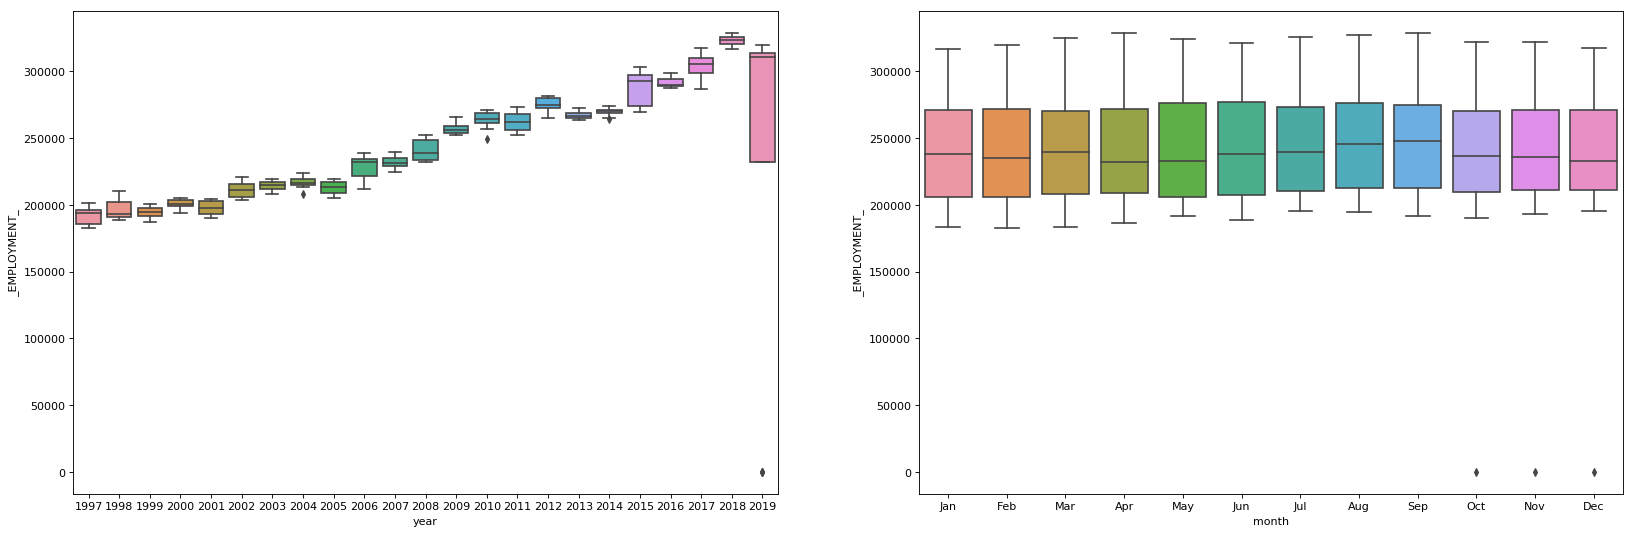

In [40]:
rslt_df = df_2N.loc[df_2N['NAICS'] == '62'] 
rslt_df['year'] = [d.year for d in rslt_df.index]
rslt_df['month'] = [d.strftime('%b') for d in rslt_df.index]
years = rslt_df['year'].unique()
fig, axes = plt.subplots(1, 2, figsize=(25,8), dpi= 80,)
sns.boxplot(x='year',y='_EMPLOYMENT_',data=rslt_df, ax=axes[0])
sns.boxplot(x='month',y='_EMPLOYMENT_',data=rslt_df, ax=axes[1])
plt.show()

CODE_3
622    23478750
621    18106500
624    14841500
623    10444250
Name: _EMPLOYMENT_, dtype: int64
<class 'pandas.core.series.Series'>


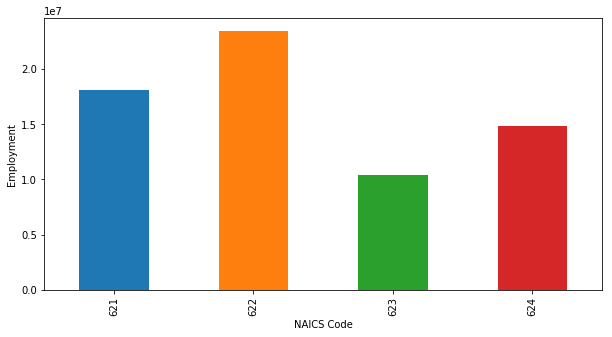

In [59]:
df1_2N=df_final[df_final['CODE_2']==62]
df_2N_sum=df1_2N.groupby(['CODE_3'])["_EMPLOYMENT_"].sum()
print(df_2N_sum.sort_values(ascending = False) )
print(type(df_2N_sum))
df_2N_sum.plot(kind="bar", figsize=(10,5))
plt.ylabel("Employment")
plt.xlabel("NAICS Code")
plt.show()

SYEAR
2004    2500000
2003    2478000
2000    2429750
2002    2374500
2007    2368750
1997    2361750
1998    2335250
2001    2329500
2005    2321000
2006    2295250
1999    2280500
2008    2135500
2018    2092250
2017    2090000
2015    2070500
2016    2041250
2012    1977250
2014    1936250
2011    1882250
2010    1855500
2009    1853500
2013    1820000
2019    1507750
Name: _EMPLOYMENT_, dtype: int64


Text(0.5,0,'Year')

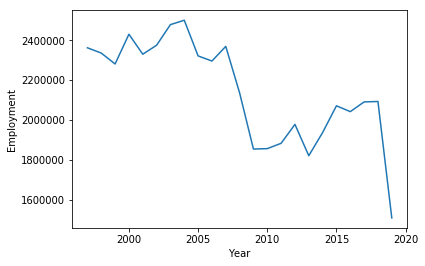

In [42]:

rslt_df = df_2N.loc[df_2N['NAICS'] == '31'] 
df_2N_ysum=rslt_df.groupby(['SYEAR'])["_EMPLOYMENT_"].sum()
print(df_2N_ysum.sort_values(ascending = False) )
df_2N_ysum.plot()
plt.ylabel("Employment")
plt.xlabel("Year")

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


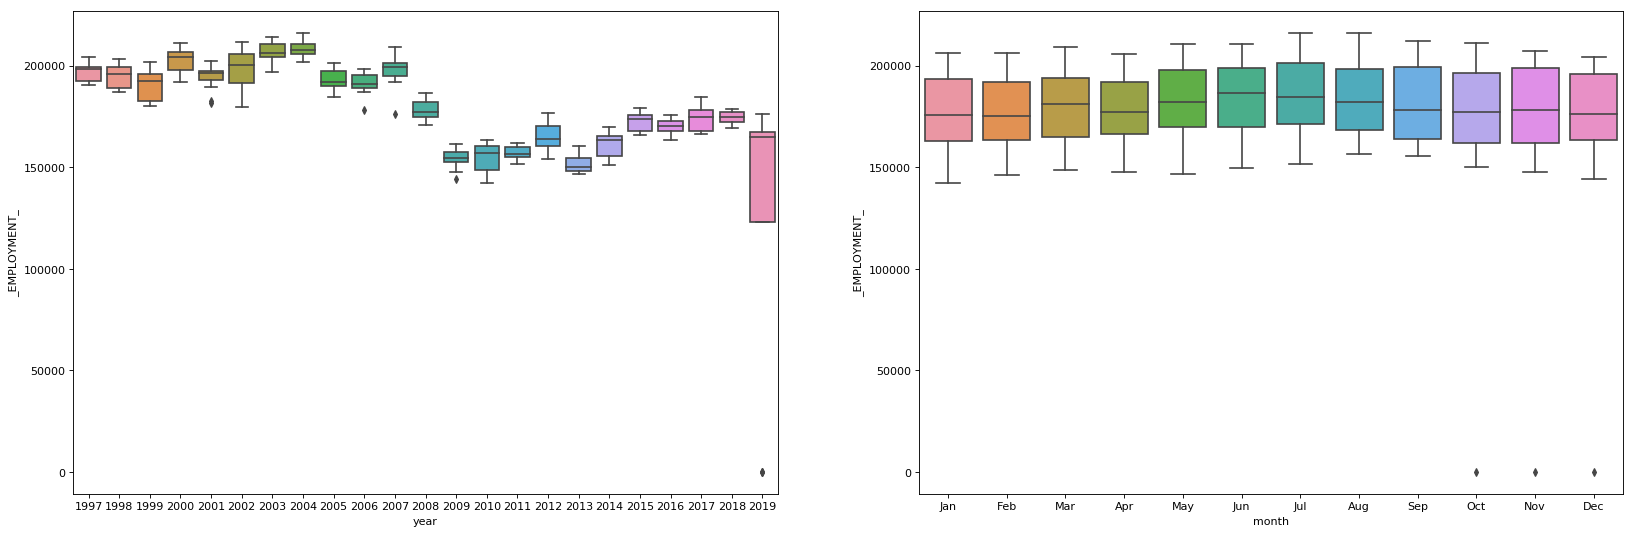

In [43]:
rslt_df = df_2N.loc[df_2N['NAICS'] == '31'] 
#print(rslt_df.index)
#df['year'] = [d.year for d in df.date]
rslt_df['year'] = [d.year for d in rslt_df.index]
rslt_df['month'] = [d.strftime('%b') for d in rslt_df.index]
years = rslt_df['year'].unique()
fig, axes = plt.subplots(1, 2, figsize=(25,8), dpi= 80,)
sns.boxplot(x='year',y='_EMPLOYMENT_',data=rslt_df, ax=axes[0])
sns.boxplot(x='month',y='_EMPLOYMENT_',data=rslt_df, ax=axes[1])
plt.show()

CODE_3
311    6442750
312    1367250
315    1309750
314     422750
316     113750
313      73000
Name: _EMPLOYMENT_, dtype: int64
<class 'pandas.core.series.Series'>


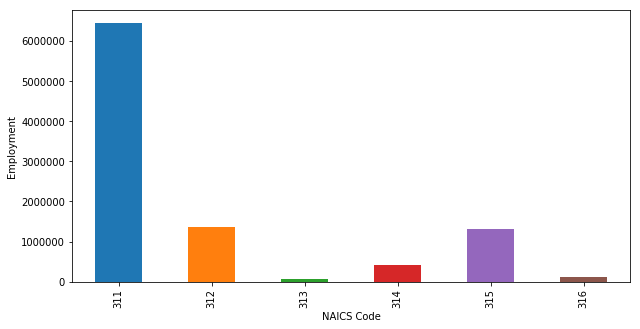

In [60]:
df1_2N=df_final[df_final['CODE_2']==31]
df_2N_sum=df1_2N.groupby(['CODE_3'])["_EMPLOYMENT_"].sum()
print(df_2N_sum.sort_values(ascending = False) )
print(type(df_2N_sum))
df_2N_sum.plot(kind="bar", figsize=(10,5))
plt.ylabel("Employment")
plt.xlabel("NAICS Code")
plt.show()

SYEAR
1997    10250
2000     8000
2008     7750
1999     7500
2007     7250
2002     7000
2005     6250
2001     4750
1998     4500
2011     3500
2006     3000
2009     2750
2012     2750
2003     1750
2010     1000
2014      250
2013      250
2004        0
2015        0
Name: _EMPLOYMENT_, dtype: int64


Text(0.5,0,'Year')

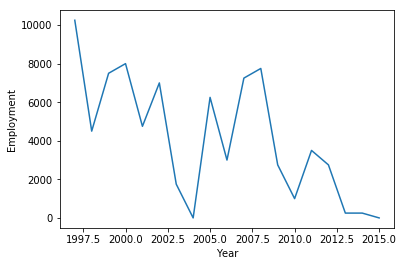

In [45]:

rslt_df = df_2N.loc[df_2N['NAICS'] == '55'] 
df_2N_ysum=rslt_df.groupby(['SYEAR'])["_EMPLOYMENT_"].sum()
print(df_2N_ysum.sort_values(ascending = False) )
df_2N_ysum.plot()
plt.ylabel("Employment")
plt.xlabel("Year")

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


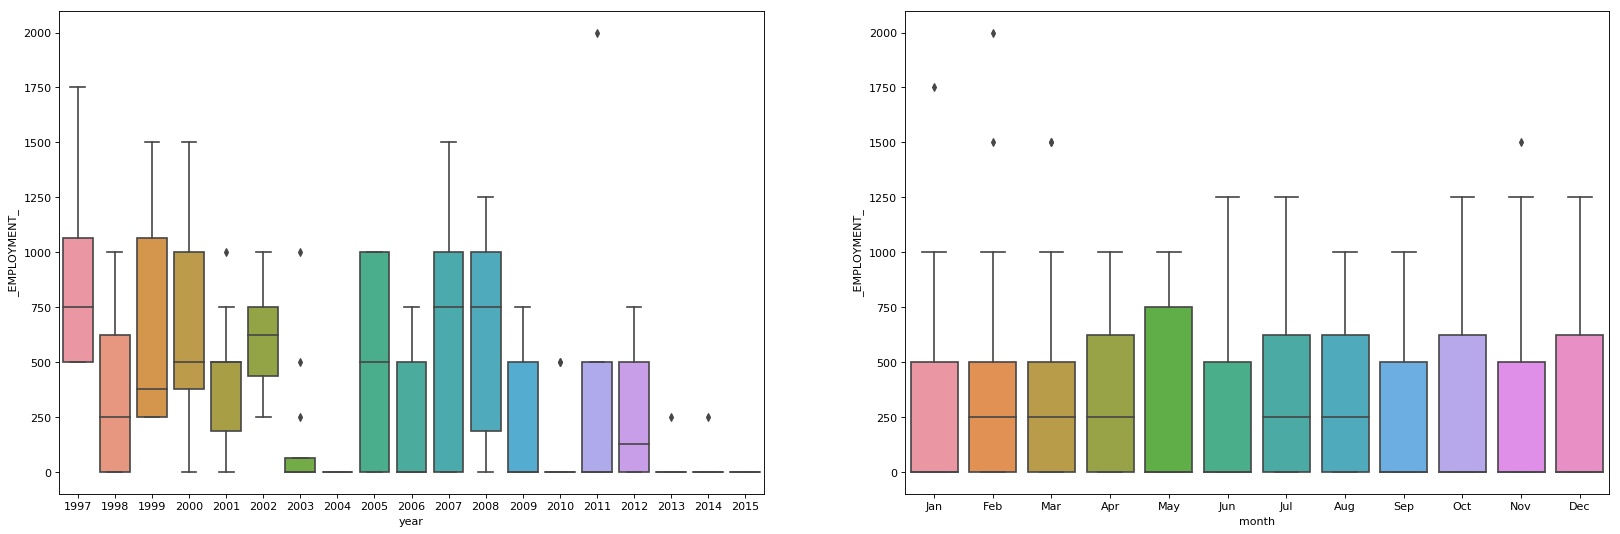

In [46]:
rslt_df = df_2N.loc[df_2N['NAICS'] == '55'] 
#print(rslt_df.index)
#df['year'] = [d.year for d in df.date]
rslt_df['year'] = [d.year for d in rslt_df.index]
rslt_df['month'] = [d.strftime('%b') for d in rslt_df.index]
years = rslt_df['year'].unique()
fig, axes = plt.subplots(1, 2, figsize=(25,8), dpi= 80,)
sns.boxplot(x='year',y='_EMPLOYMENT_',data=rslt_df, ax=axes[0])
sns.boxplot(x='month',y='_EMPLOYMENT_',data=rslt_df, ax=axes[1])
plt.show()

CODE_3
55    78500
Name: _EMPLOYMENT_, dtype: int64
<class 'pandas.core.series.Series'>


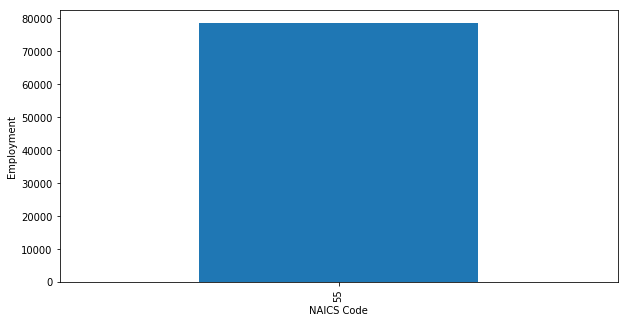

In [66]:
df1_2N=df_final[df_final['CODE_2']==55]
df_2N_sum=df1_2N.groupby(['CODE_3'])["_EMPLOYMENT_"].sum()
print(df_2N_sum.sort_values(ascending = False) )
print(type(df_2N_sum))
df_2N_sum.plot(kind="bar", figsize=(10,5))
plt.ylabel("Employment")
plt.xlabel("NAICS Code")
plt.show()

SYEAR
2016    357750
2017    347000
2014    344500
2018    343500
2013    331500
2015    328500
2012    301250
2011    297750
2008    294000
2009    283000
2010    281000
2019    249250
2007    237000
2006    229750
1998    214250
1997    201750
1999    178000
2005    165750
2003    157000
2000    154000
2001    136250
2004    135500
2002    110500
Name: _EMPLOYMENT_, dtype: int64


Text(0.5,0,'Year')

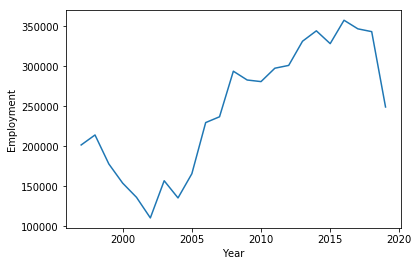

In [48]:

rslt_df = df_2N.loc[df_2N['NAICS'] == '21'] 
df_2N_ysum=rslt_df.groupby(['SYEAR'])["_EMPLOYMENT_"].sum()
print(df_2N_ysum.sort_values(ascending = False) )
df_2N_ysum.plot()
plt.ylabel("Employment")
plt.xlabel("Year")

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


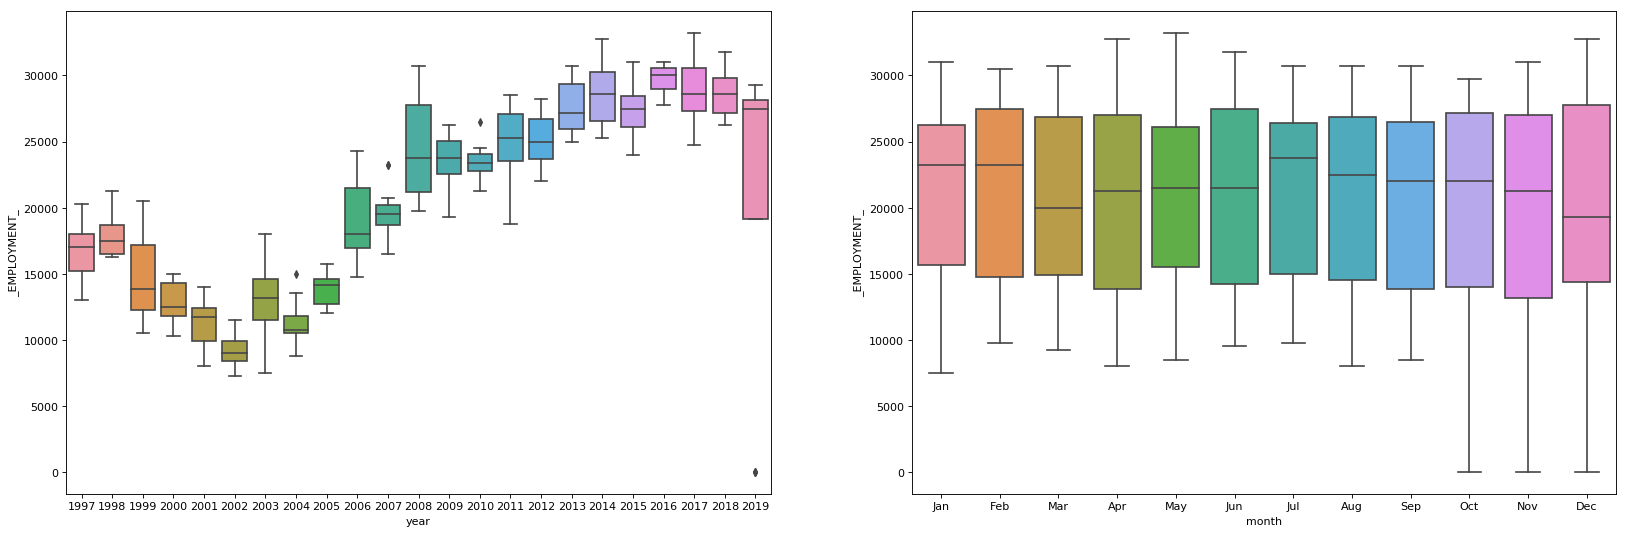

In [63]:
rslt_df = df_2N.loc[df_2N['NAICS'] == '21'] 
#print(rslt_df.index)
#df['year'] = [d.year for d in df.date]
rslt_df['year'] = [d.year for d in rslt_df.index]
rslt_df['month'] = [d.strftime('%b') for d in rslt_df.index]
years = rslt_df['year'].unique()
fig, axes = plt.subplots(1, 2, figsize=(25,8), dpi= 80,)
sns.boxplot(x='year',y='_EMPLOYMENT_',data=rslt_df, ax=axes[0])
sns.boxplot(x='month',y='_EMPLOYMENT_',data=rslt_df, ax=axes[1])
plt.show()

CODE_3
212    2682250
213    1803500
211     859000
Name: _EMPLOYMENT_, dtype: int64
<class 'pandas.core.series.Series'>


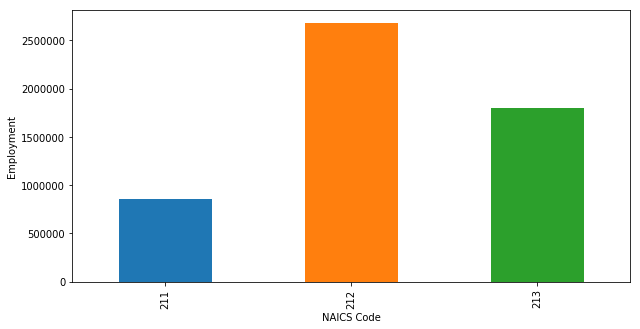

In [64]:
df1_2N=df_final[df_final['CODE_2']==21]
df_2N_sum=df1_2N.groupby(['CODE_3'])["_EMPLOYMENT_"].sum()
print(df_2N_sum.sort_values(ascending = False) )
print(type(df_2N_sum))
df_2N_sum.plot(kind="bar", figsize=(10,5))
plt.ylabel("Employment")
plt.xlabel("NAICS Code")
plt.show()

SYEAR
2015    174000
2018    166750
2014    164750
2016    161750
2017    154500
2008    149500
2010    146000
2009    143250
2011    136000
1998    135750
2013    135000
1999    134000
2003    133750
2012    133500
2002    130750
2001    126500
2000    124000
2005    122500
1997    120250
2007    118500
2019    111750
2004    109250
2006     98750
Name: _EMPLOYMENT_, dtype: int64


Text(0.5,0,'Year')

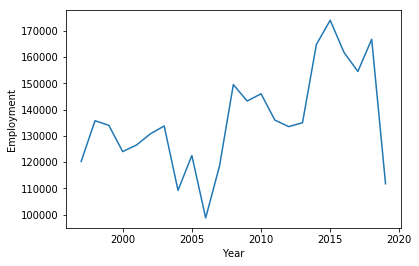

In [51]:
rslt_df = df_2N.loc[df_2N['NAICS'] == '22'] 
df_2N_ysum=rslt_df.groupby(['SYEAR'])["_EMPLOYMENT_"].sum()
print(df_2N_ysum.sort_values(ascending = False) )
df_2N_ysum.plot()
plt.ylabel("Employment")
plt.xlabel("Year")

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


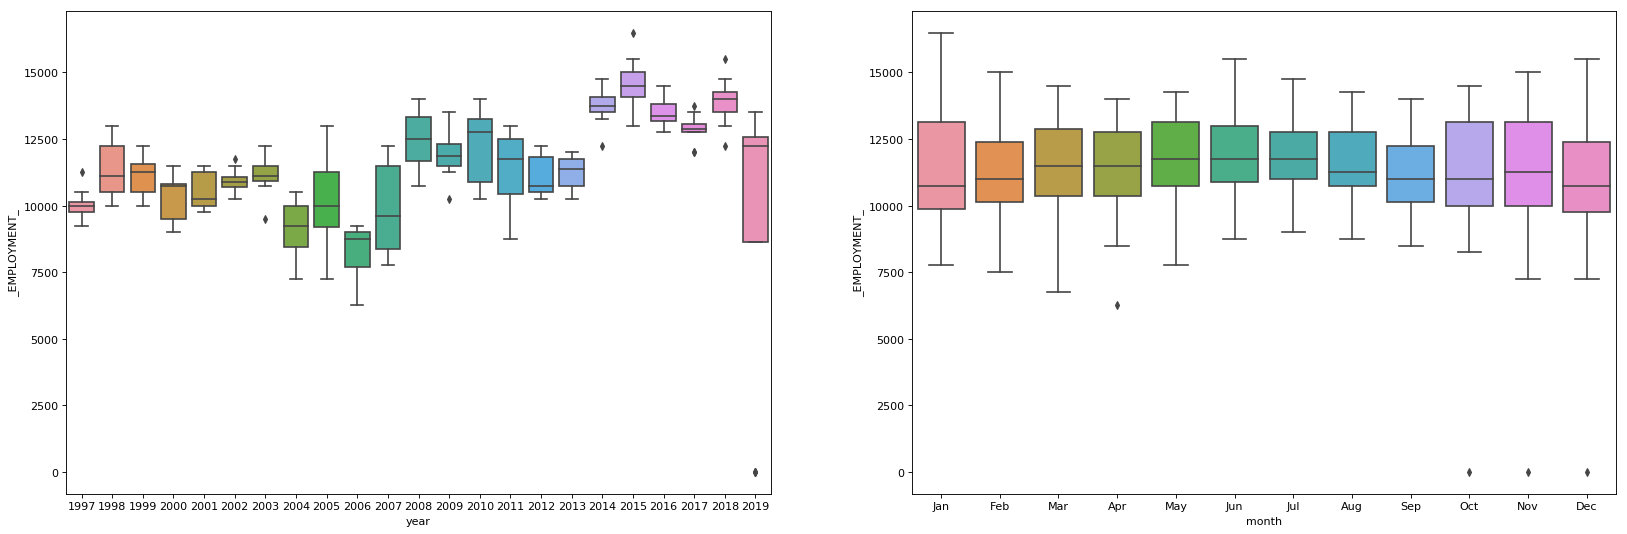

In [52]:
rslt_df = df_2N.loc[df_2N['NAICS'] == '22'] 
#print(rslt_df.index)
#df['year'] = [d.year for d in df.date]
rslt_df['year'] = [d.year for d in rslt_df.index]
rslt_df['month'] = [d.strftime('%b') for d in rslt_df.index]
years = rslt_df['year'].unique()
fig, axes = plt.subplots(1, 2, figsize=(25,8), dpi= 80,)
sns.boxplot(x='year',y='_EMPLOYMENT_',data=rslt_df, ax=axes[0])
sns.boxplot(x='month',y='_EMPLOYMENT_',data=rslt_df, ax=axes[1])
plt.show()

CODE_3
22    3130750
Name: _EMPLOYMENT_, dtype: int64
<class 'pandas.core.series.Series'>


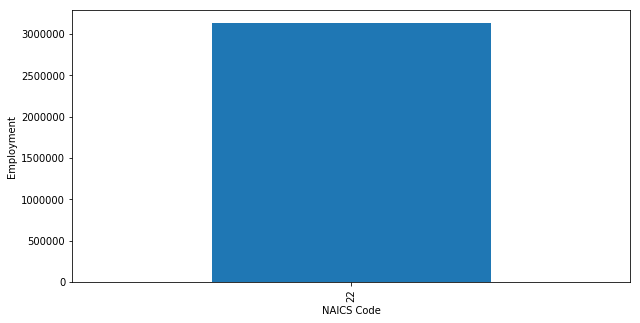

In [61]:
df1_2N=df_final[df_final['CODE_2']==22]
df_2N_sum=df1_2N.groupby(['CODE_3'])["_EMPLOYMENT_"].sum()
print(df_2N_sum.sort_values(ascending = False) )
print(type(df_2N_sum))
df_2N_sum.plot(kind="bar", figsize=(10,5))
plt.ylabel("Employment")
plt.xlabel("NAICS Code")
plt.show()

SYEAR
2018    2860750
2017    2743250
2008    2616750
2016    2536000
2013    2453000
2009    2444750
2015    2417750
2014    2406500
2012    2383250
2010    2380750
2011    2365750
2007    2301000
2019    2131500
2006    2097000
2005    1989000
2004    1705000
1997    1489750
1998    1424750
2003    1412000
2002    1401500
1999    1363500
2001    1347250
2000    1345750
Name: _EMPLOYMENT_, dtype: int64


Text(0.5,0,'Year')

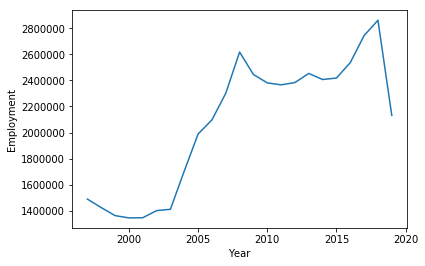

In [67]:
rslt_df = df_2N.loc[df_2N['NAICS'] == '23'] 
df_2N_ysum=rslt_df.groupby(['SYEAR'])["_EMPLOYMENT_"].sum()
print(df_2N_ysum.sort_values(ascending = False) )
df_2N_ysum.plot()
plt.ylabel("Employment")
plt.xlabel("Year")

CODE_3
23    47616500
Name: _EMPLOYMENT_, dtype: int64
<class 'pandas.core.series.Series'>


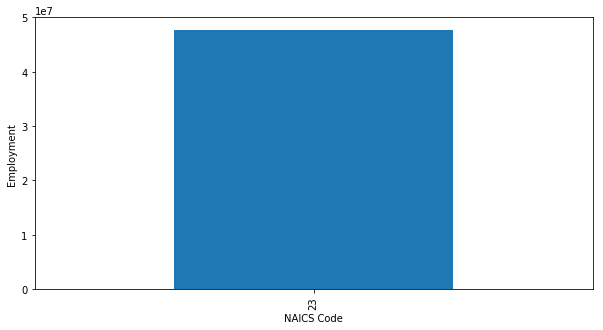

In [73]:
df1_2N=df_final[df_final['CODE_2']==23]
df_2N_sum=df1_2N.groupby(['CODE_3'])["_EMPLOYMENT_"].sum()
print(df_2N_sum.sort_values(ascending = False) )
print(type(df_2N_sum))
df_2N_sum.plot(kind="bar", figsize=(10,5))
plt.ylabel("Employment")
plt.xlabel("NAICS Code")
plt.show()

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


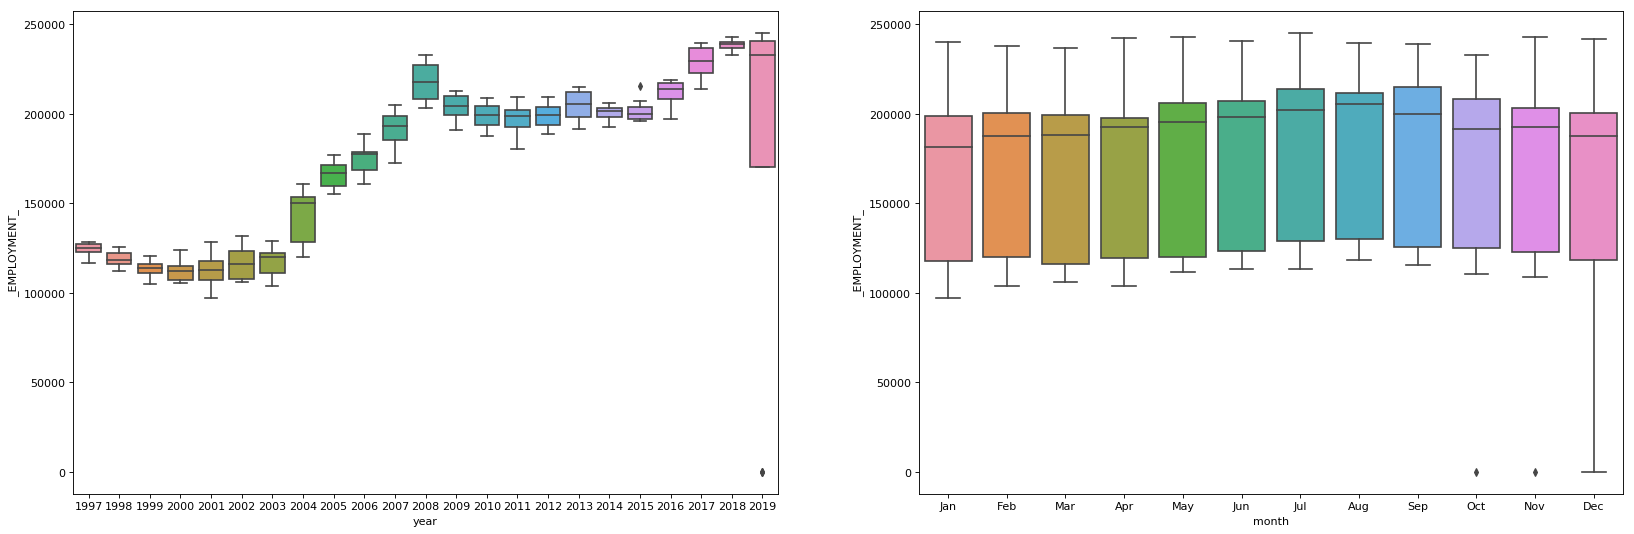

In [72]:
rslt_df = df_2N.loc[df_2N['NAICS'] == '23'] 
#print(rslt_df.index)
#df['year'] = [d.year for d in df.date]
rslt_df['year'] = [d.year for d in rslt_df.index]
rslt_df['month'] = [d.strftime('%b') for d in rslt_df.index]
years = rslt_df['year'].unique()
fig, axes = plt.subplots(1, 2, figsize=(25,8), dpi= 80,)
sns.boxplot(x='year',y='_EMPLOYMENT_',data=rslt_df, ax=axes[0])
sns.boxplot(x='month',y='_EMPLOYMENT_',data=rslt_df, ax=axes[1])
plt.show()